In [18]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import datetime
%matplotlib inline
from sklearn.decomposition import PCA
import mca

In [19]:
data = pd.read_csv("WISE_NEA_COMET_DISCOVERY_STATISTICS.csv")

In [20]:
data.head()

,Designation,Discovery Date YYYY-MM-DD,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),PHA,Orbit Class
0,419880 (2011 AH37),01/07/2011,19.7,0.035,0.84,4.26,4.06,9.65,Y,Apollo
1,419624 (2010 SO16),09/17/2010,20.5,0.028,0.93,1.08,1.00,14.52,Y,Apollo
2,414772 (2010 OC103),07/28/2010,19.0,0.333,0.39,2.00,1.31,23.11,N,Apollo
3,414746 (2010 EH20),03/06/2010,18.0,0.268,1.25,3.99,4.24,23.89,N,Amor
4,407324 (2010 OB101),07/18/2010,20.7,0.111,0.77,2.46,2.06,9.12,N,Apollo


In [21]:
data['Year'] = pd.DatetimeIndex(data['Discovery Date YYYY-MM-DD']).year
data['Month'] = pd.DatetimeIndex(data['Discovery Date YYYY-MM-DD']).month
data['Day'] = pd.DatetimeIndex(data['Discovery Date YYYY-MM-DD']).day
data.head()

,Designation,Discovery Date YYYY-MM-DD,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),PHA,Orbit Class,Year,Month,Day
0,419880 (2011 AH37),01/07/2011,19.7,0.035,0.84,4.26,4.06,9.65,Y,Apollo,2011,1,7
1,419624 (2010 SO16),09/17/2010,20.5,0.028,0.93,1.08,1.00,14.52,Y,Apollo,2010,9,17
2,414772 (2010 OC103),07/28/2010,19.0,0.333,0.39,2.00,1.31,23.11,N,Apollo,2010,7,28
3,414746 (2010 EH20),03/06/2010,18.0,0.268,1.25,3.99,4.24,23.89,N,Amor,2010,3,6
4,407324 (2010 OB101),07/18/2010,20.7,0.111,0.77,2.46,2.06,9.12,N,Apollo,2010,7,18


In [22]:
def standardization(x):
    x_bar = np.mean(x)
    s = np.std(x)
    x_z = (x - x_bar) / s
    return(x_z)
data_stnd = data
data_stnd.iloc[:,2:8]= data.iloc[:,2:8].apply(standardization, broadcast = True)
data_stnd.head()

,Designation,Discovery Date YYYY-MM-DD,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),PHA,Orbit Class,Year,Month,Day
0,419880 (2011 AH37),01/07/2011,-0.402246,-0.409585,-0.301366,-0.113559,-0.104015,-0.724401,Y,Apollo,2011,1,7
1,419624 (2010 SO16),09/17/2010,0.124860,-0.419286,-0.180018,-0.115122,-0.104045,-0.545621,Y,Apollo,2010,9,17
2,414772 (2010 OC103),07/28/2010,-0.863463,0.003408,-0.908102,-0.114670,-0.104042,-0.230277,N,Apollo,2010,7,28
3,414746 (2010 EH20),03/06/2010,-1.522345,-0.086674,0.251438,-0.113692,-0.104013,-0.201643,N,Amor,2010,3,6
4,407324 (2010 OB101),07/18/2010,0.256636,-0.304257,-0.395747,-0.114444,-0.104035,-0.743858,N,Apollo,2010,7,18


#PCA

###Version 1- no Datetime or categorical variables in PCA

In [23]:
pca_df1 = data_stnd.iloc[:,2:8]
pca_df1.head()

,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg)
0,-0.402246,-0.409585,-0.301366,-0.113559,-0.104015,-0.724401
1,0.124860,-0.419286,-0.180018,-0.115122,-0.104045,-0.545621
2,-0.863463,0.003408,-0.908102,-0.114670,-0.104042,-0.230277
3,-1.522345,-0.086674,0.251438,-0.113692,-0.104013,-0.201643
4,0.256636,-0.304257,-0.395747,-0.114444,-0.104035,-0.743858


In [24]:
RR_1 = pca_df1.corr()
eigen_RR_1 = np.linalg.eig(RR_1)
print(eigen_RR_1[0] / sum(eigen_RR_1[0]))
PCs_1 = np.dot(pca_df1, eigen_RR_1[1][:, :2])

[ 0.52743239  0.22733159  0.16617089  0.08040371 -0.00292132  0.00158275]


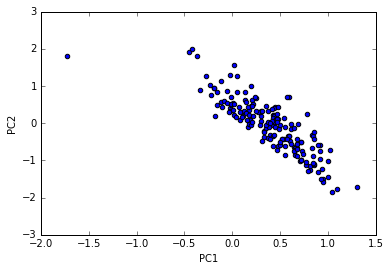

In [25]:
pp.scatter(PCs_1[:, 0], PCs_1[:, 1])
pp.xlabel('PC1')
pp.ylabel('PC2')

###Version 4- PHA, no Datetime in PCA

In [34]:
pca_df4 = data_stnd.iloc[:,2:8]
pca_df4['PHA'] = data_stnd['PHA']
pca_df4['PHA'] = pd.get_dummies(pca_df4['PHA'])
pca_df4.head()

,H (mag),MOID (AU),q (AU),Q (AU),period (yr),i (deg),PHA
0,-0.402246,-0.409585,-0.301366,-0.113559,-0.104015,-0.724401,0
1,0.124860,-0.419286,-0.180018,-0.115122,-0.104045,-0.545621,0
2,-0.863463,0.003408,-0.908102,-0.114670,-0.104042,-0.230277,1
3,-1.522345,-0.086674,0.251438,-0.113692,-0.104013,-0.201643,1
4,0.256636,-0.304257,-0.395747,-0.114444,-0.104035,-0.743858,1


In [35]:
RR_4 = pca_df4.corr()
eigen_RR_4 = np.linalg.eig(RR_4)
print(eigen_RR_4[0] / sum(eigen_RR_4[0]))
PCs_4 = np.dot(pca_df4, eigen_RR_4[1][:, :2])

[ 0.47487586  0.1950621   0.16688803  0.09923558  0.06511771 -0.00253526
  0.00135599]


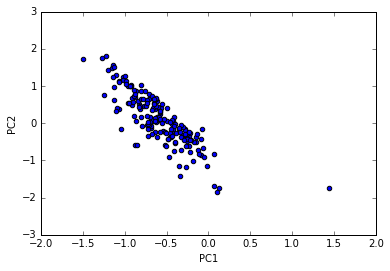

In [36]:
pp.scatter(PCs_4[:, 0], PCs_4[:, 1])
pp.xlabel('PC1')
pp.ylabel('PC2')